In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import scatterplot_solution_1, scatterplot_solution_2

In [4]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0,0.5,'Combined Fuel Eff (mpg)')

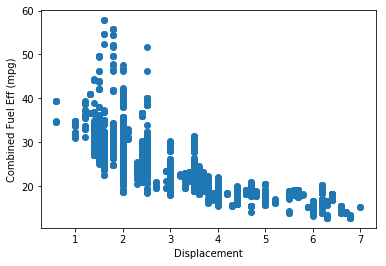

In [7]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff (mpg)')

Text(0,0.5,'Combined Fuel Eff (mpg)')

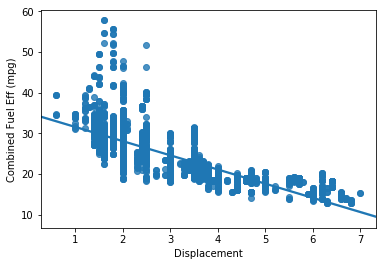

In [8]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff (mpg)')

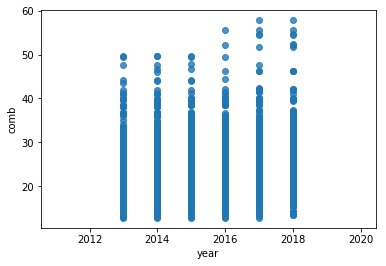

In [9]:
sb.regplot(data = fuel_econ, x = 'year', y='comb', fit_reg=False)

### jitter ###

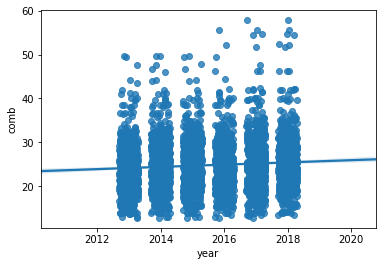

In [10]:
sb.regplot(data = fuel_econ, x = 'year', y='comb', x_jitter = 0.3)

### transparency ###


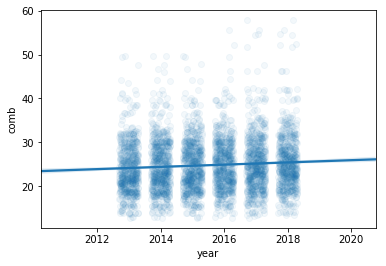

In [12]:
sb.regplot(data = fuel_econ, x = 'year', y='comb', x_jitter = 0.3, scatter_kws = {'alpha': 1/20})

## heatmaps ## 
good for 2 varables  
bin sizes are important

Text(0,0.5,'Combined Fuel Eff (mpg)')

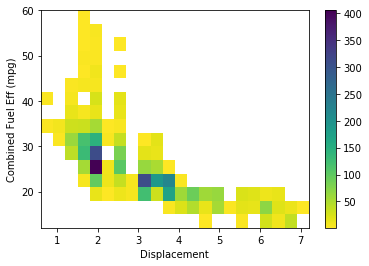

In [22]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff (mpg)')

In [18]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


## violin plots ##


Used a violin plot to depict the data in this case; you might have chosen a box plot instead. One of the interesting things about the relationship between variables is that it isn't consistent. Compact cars tend to have smaller engine sizes than the minicompact and subcompact cars, even though those two vehicle sizes are smaller. The box plot would make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.

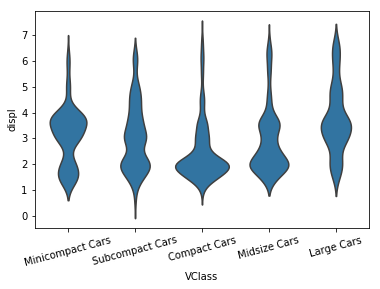

In [27]:
# data setup
fuel_econ = pd.read_csv('./data/fuel_econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)

# plotting
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color, inner = None)
plt.xticks(rotation = 15);

## box plot##

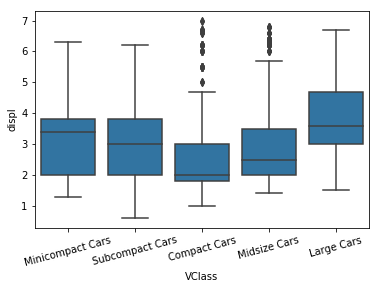

In [36]:
# data setup
fuel_econ = pd.read_csv('./data/fuel_econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)

# plotting
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15);

## Clustered Bar Charts ##


**Task:** Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) Note: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

We chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

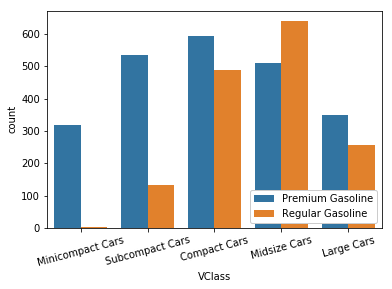

In [51]:
    # data setup
    fuel_econ = pd.read_csv('./data/fuel_econ.csv')
    
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else: # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

    # plotting
    ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
    ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
    plt.xticks(rotation = 15)


## Faceting ##

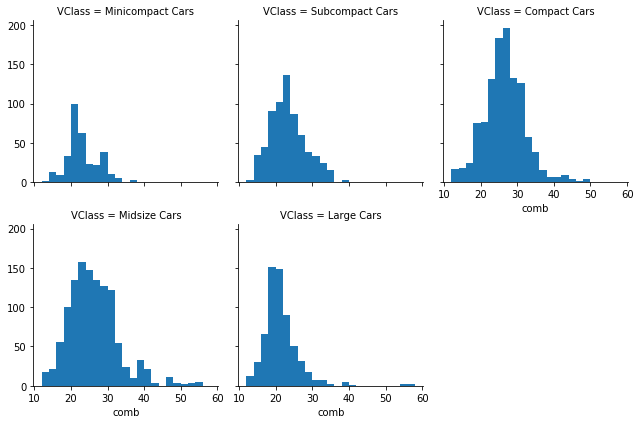

In [55]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3);
g.map(plt.hist, 'comb', bins = bins);

## Line Plots ##


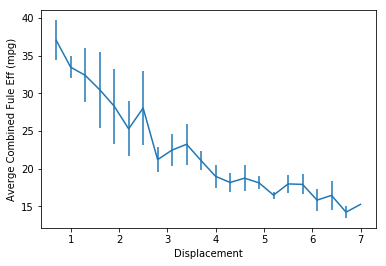

In [76]:
bins_e = np.arange(0.6, 7+0.2, 0.3)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

#plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');

plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);
plt.xlabel('Displacement');
plt.ylabel('Averge Combined Fule Eff (mpg)');

**Task 1:** Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.

Text(0.5,0,'Average Combined Fuel Eff. (mpg)')

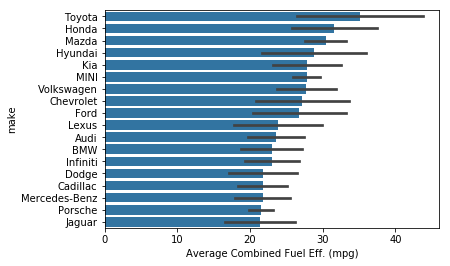

In [79]:
    # data setup
    fuel_econ = pd.read_csv('./data/fuel_econ.csv')

    most_makes = fuel_econ['make'].value_counts().index[:18]
    fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

    make_means = fuel_econ_sub.groupby('make').mean()
    comb_order = make_means.sort_values('comb', ascending = False).index

    # plotting
    base_color = sb.color_palette()[0]
    sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
               color = base_color, order = comb_order, ci = 'sd')
    plt.xlabel('Average Combined Fuel Eff. (mpg)')

**Task 2:** Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. Hint: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

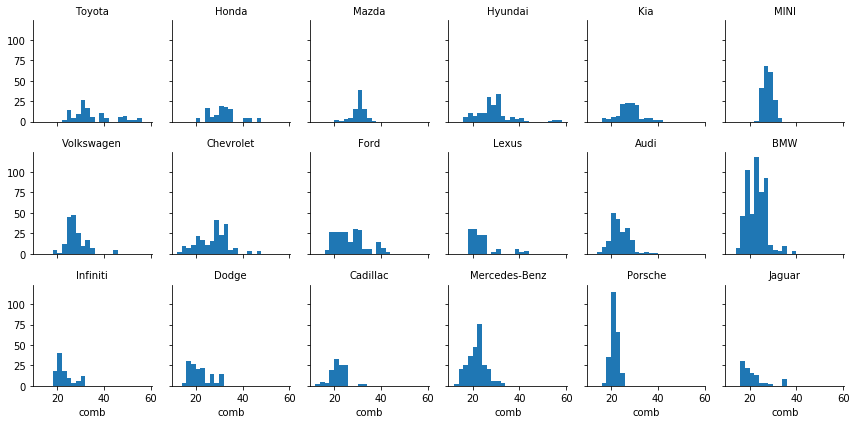

In [81]:
    # data setup
    fuel_econ = pd.read_csv('./data/fuel_econ.csv')

    most_makes = fuel_econ['make'].value_counts().index[:18]
    fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

    make_means = fuel_econ_sub.groupby('make').mean()
    comb_order = make_means.sort_values('comb', ascending = False).index

    # plotting
    g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, height = 2, col_order = comb_order)
    # try sb.distplot instead of plt.hist to see the plot in terms of density!
    g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
    g.set_titles('{col_name}')